# Retail Explanatory Data Analysis

#### Imports 

In [683]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import os


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler



# Suppress warnings
warnings.filterwarnings('ignore')

In [684]:
retail_df = pd.read_excel('/Users/darylwanji/Desktop/Data Projects /Darylwanji-Data-Insights-for-Call-Center-Efficiency-and-Performance/Data/Online Retail Data Set.xlsx')
retail_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
423405,573141,21914,BLUE HARMONICA IN BOX,12,2011-10-27 17:35:00,1.25,16680.0,United Kingdom
403037,571544,21914,BLUE HARMONICA IN BOX,3,2011-10-17 16:53:00,1.25,17757.0,United Kingdom
513252,579541,23339,EGG FRYING PAN BLUE,1,2011-11-30 10:12:00,2.08,14653.0,United Kingdom
424004,573175,22633,HAND WARMER UNION JACK,12,2011-10-28 10:27:00,2.10,15096.0,United Kingdom
102666,545027,21078,SET/20 STRAWBERRY PAPER NAPKINS,4,2011-02-25 14:59:00,2.46,NaN,United Kingdom


### Understanding Data Structure

In [685]:
retail_df.shape

(541909, 8)

> 541,909 Observations for 8 variables

In [686]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> CustomerID and Description have some null values, 

In [687]:
retail_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


> Min Qty is negative ? Why ?       
> Min Unit Price is negative? Why?

In [688]:
# Only for object data
retail_df.describe(include='O')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


> Unique StockCode > Unique Description ? Why       
> One would expect a stockcode to be associated with a Description in a 1-1 relationship.

#### Data Cleaning 

In [689]:
# Check for missing values
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

> Description and CustomerID have null values.

In [690]:
# First 10 rows with no CustomerID
retail_df[retail_df['CustomerID'].isna()].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6346,536876,21990,MODERN FLORAL STATIONERY SET,3,2010-12-03 11:36:00,2.51,NaN,United Kingdom
319295,564847,23256,CHILDRENS CUTLERY SPACEBOY,1,2011-08-30 15:31:00,4.15,NaN,United Kingdom
333889,566221,22819,"BIRTHDAY CARD, RETRO SPOT",2,2011-09-09 16:13:00,0.42,NaN,United Kingdom
248079,558777,35923,CANDY HEART HANGING DECORATION,1,2011-07-04 10:23:00,0.83,NaN,United Kingdom
511028,579471,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,1,2011-11-29 15:08:00,4.13,NaN,United Kingdom
501615,578827,23350,ROLL WRAP VINTAGE SPOT,1,2011-11-25 14:25:00,2.46,NaN,United Kingdom
329097,565840,23334,IVORY WICKER HEART SMALL,1,2011-09-07 12:02:00,1.25,NaN,United Kingdom
176302,551997,20723,STRAWBERRY CHARLOTTE BAG,1,2011-05-05 15:47:00,1.63,NaN,United Kingdom
352463,567673,21314,SMALL GLASS HEART TRINKET POT,1,2011-09-21 15:43:00,4.13,NaN,United Kingdom
168069,551010,21843,RED RETROSPOT CAKE STAND,1,2011-04-26 09:52:00,20.79,NaN,United Kingdom


> There are negative Quantities associated with NaN CustomerID. First thought would be dropping all rows with no CustomerID.            
> Pending investigation.

In [691]:
retail_df[retail_df['Quantity'] < 0 ].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


> Negative Quantities have something in common, their InvoiceNo start with " C " 

In [692]:
len(retail_df[retail_df['Quantity'] < 0 ]['InvoiceNo'].unique()), retail_df[retail_df['Quantity'] < 0 ]['InvoiceNo'].unique()

(5172,
 array(['C536379', 'C536383', 'C536391', ..., 'C581499', 'C581568',
        'C581569'], dtype=object))

> 5000+ unique InvoiceNo associated with negative Quatity       

In [693]:
#Preparing for string manipulation
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype(str)

# Checking Rows with invoiceNo having 6 consecutive digits
retail_df[retail_df["InvoiceNo"].str.match("^\\d{6}$") == False]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [694]:
# Unique Letters in Invoice
retail_df['InvoiceNo'].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

> C -> Cancelled        
> A -> Adjustments

In [695]:
retail_df[retail_df['InvoiceNo'].str.startswith("A")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


> Only 3 rows with Adjustments done, All with No CustomerID

In [696]:
retail_df["StockCode"] = retail_df["StockCode"].astype("str")

retail_df[~retail_df["StockCode"].str.match("^\\d{5}$")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


> There seem to have StockCodes with Letters at the end, and some are just Letters E.g POST     
> Assume format was intended

In [697]:
retail_df["StockCode"] = retail_df["StockCode"].astype("str")

retail_df[~retail_df["StockCode"].str.match("^\\d{5}$") & 
                      ~retail_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

# Data Cleaning

In [698]:
cleaned_retail_df  = retail_df.copy()

In [699]:
# Filtering InvoiceNo
cleaned_retail_df['InvoiceNo'] = cleaned_retail_df["InvoiceNo"].astype("str")
mask = (
    cleaned_retail_df["InvoiceNo"].str.match("^\\d{6}$") == True
) 
cleaned_retail_df = cleaned_retail_df[mask]
cleaned_retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [700]:
# Filtering InvoiceNo
cleaned_retail_df['StockCode'] = cleaned_retail_df["StockCode"].astype("str")
mask = (
    (cleaned_retail_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_retail_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_retail_df["StockCode"].str.match("^PADS$") == True)
) 
cleaned_retail_df = cleaned_retail_df[mask]
cleaned_retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [701]:
cleaned_retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530214.000000,530214,530214.000000,396374.000000
mean,10.256474,2011-07-04 18:23:36.303567616,3.249991,15301.603824
min,-9600.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,13975.000000
50%,3.000000,2011-07-20 12:05:00,2.080000,15159.000000
75%,11.000000,2011-10-19 12:35:00,4.130000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,159.899208,NaN,4.373327,1709.976485


In [702]:
cleaned_retail_df.dropna(subset="CustomerID",inplace=True)
cleaned_retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [703]:
cleaned_retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396374.000000,396374,396374.000000,396374.000000
mean,13.046353,2011-07-11 00:04:48.847805440,2.867954,15301.603824
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.732689,NaN,4.264554,1709.976485


In [704]:
len(cleaned_retail_df[cleaned_retail_df["UnitPrice"] == 0])

34

In [705]:
cleaned_retail_df = cleaned_retail_df[cleaned_retail_df["UnitPrice"] > 0]
cleaned_retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [706]:
cleaned_retail_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396340.000000,396340,396340.000000,396340.000000
mean,13.012456,2011-07-11 00:04:40.164908544,2.868200,15301.689070
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,179.640568,NaN,4.264654,1709.957487


In [707]:
len(cleaned_retail_df)/len(retail_df)

0.7313774083840645

> About 26% of Data Dropped.

In [ ]:
# Adding TotalRevenue column
cleaned_retail_df['TotalRevenue'] = cleaned_retail_df['Quantity'] * cleaned_retail_df['UnitPrice']
cleaned_retail_df["CustomerID"] = cleaned_retail_df["CustomerID"].astype("int")

# Display the DataFrame with the new column
cleaned_retail_df = cleaned_retail_df[['CustomerID','InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'TotalRevenue','Country']]
cleaned_retail_df.sample(5)

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalRevenue,Country
304009,15786,563557,22488,NATURAL SLATE RECTANGLE CHALKBOARD,12,2011-08-17 13:33:00,1.65,19.80,United Kingdom
271907,16464,560723,21975,PACK OF 60 DINOSAUR CAKE CASES,1,2011-07-20 13:53:00,0.55,0.55,United Kingdom
423680,17602,573151,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2011-10-27 20:09:00,0.55,13.20,United Kingdom
236166,14911,557742,23165,LARGE CERAMIC TOP STORAGE JAR,12,2011-06-22 11:46:00,1.65,19.80,EIRE
411849,14646,572236,23513,EMBROIDERED RIBBON REEL SUSIE,3,2011-10-21 14:42:00,2.08,6.24,Netherlands


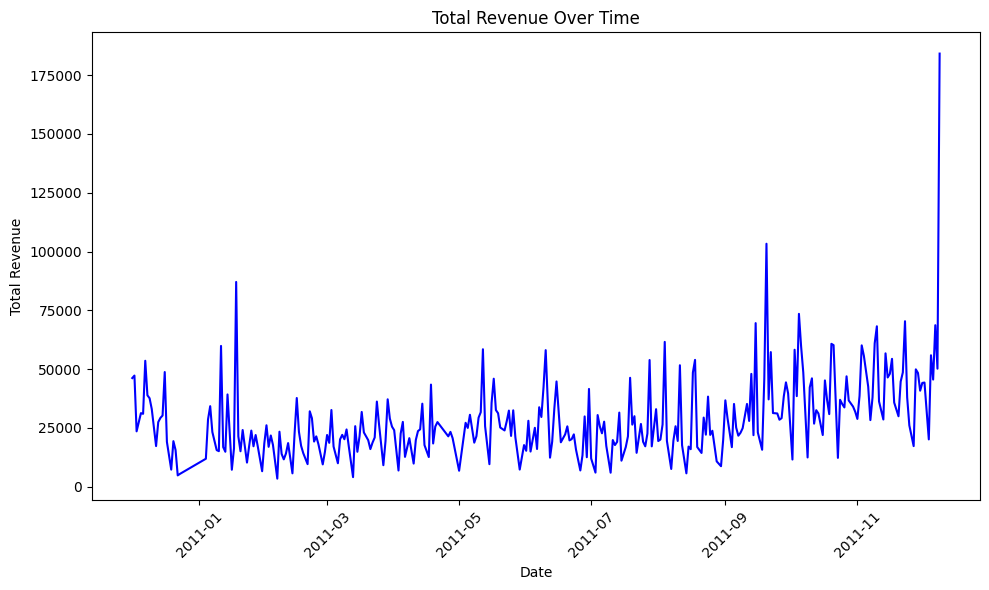

In [709]:
# Group by date and sum TotalRevenue for each day
daily_revenue = cleaned_retail_df.groupby(cleaned_retail_df['InvoiceDate'].dt.date)['TotalRevenue'].sum().reset_index()
daily_revenue.columns = ['Date', 'TotalRevenue']

# Plotting the time series using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_revenue, x='Date', y='TotalRevenue', color='b')
plt.title("Total Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Day with lowest revenue happened in January 2011 (2011-01)        
> Day with Highest revenue happened in November 2011 (2011-11)      
> Daily revenue varies a lot, there are a lot of factors that can affect sales, such as : seasonal proomotions, product availability, Marketing success etc.        

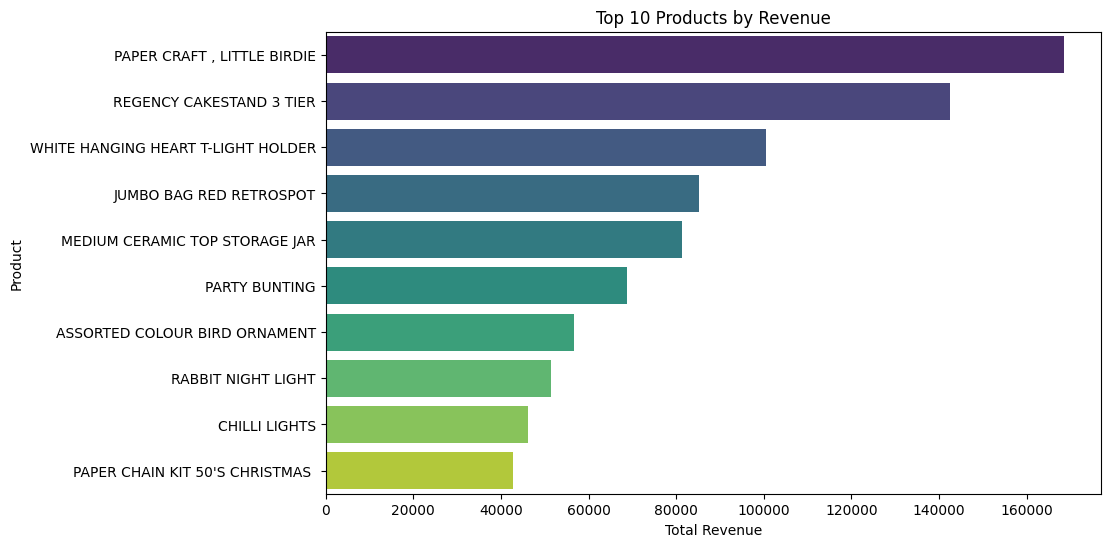

In [710]:
# Calculate total revenue by product
product_revenue = cleaned_retail_df.groupby('Description')['TotalRevenue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=product_revenue, x='TotalRevenue', y='Description', palette='viridis')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product")
plt.show()

> Dotcom postage makes the Most revenue.

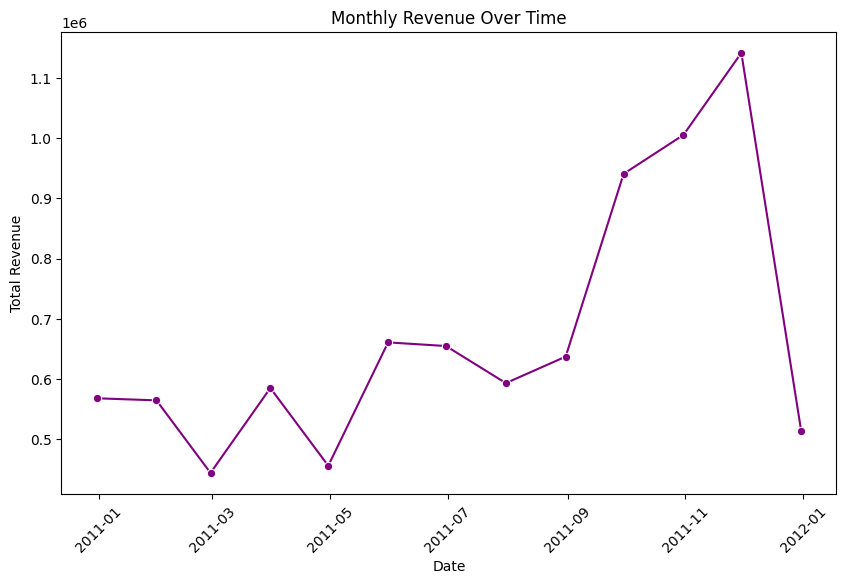

In [711]:
cleaned_retail_df['InvoiceDate'] = pd.to_datetime(cleaned_retail_df['InvoiceDate'])
monthly_revenue = cleaned_retail_df.set_index('InvoiceDate').resample('M')['TotalRevenue'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='purple')
plt.title("Monthly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

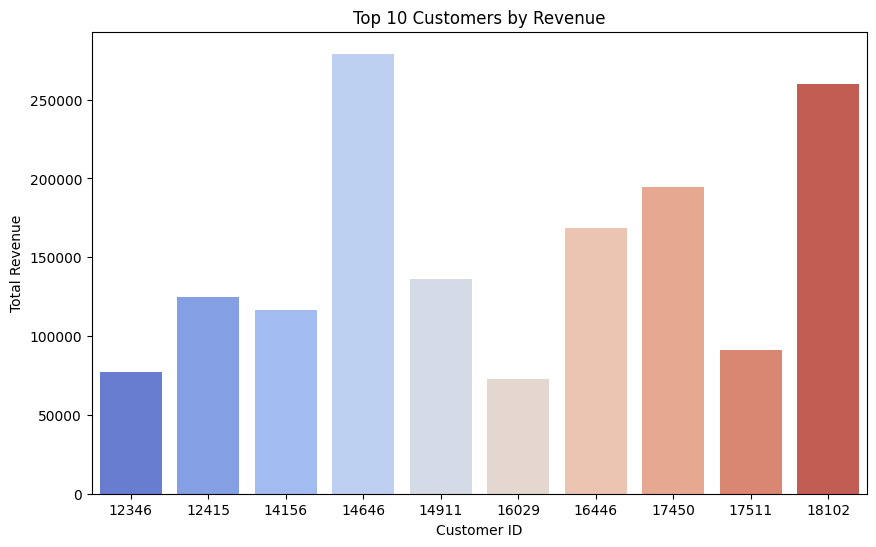

In [712]:
top_customers = cleaned_retail_df.groupby('CustomerID')['TotalRevenue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='CustomerID', y='TotalRevenue', palette='coolwarm')
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Customer ID")
plt.show()

Customers with Missing Customer ID made about 5x more than the customer with the largest revenue (14646)

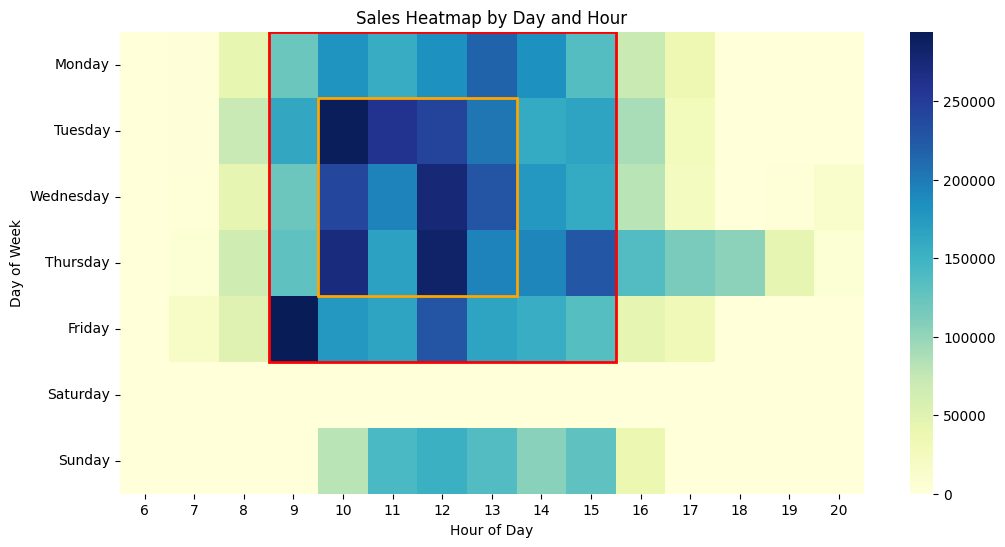

In [713]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Rectangle

cleaned_retail_df['DayOfWeek'] = cleaned_retail_df['InvoiceDate'].dt.day_name()
cleaned_retail_df['Hour'] = cleaned_retail_df['InvoiceDate'].dt.hour

# Days of Week order 
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
cleaned_retail_df['DayOfWeek'] = pd.Categorical(cleaned_retail_df['DayOfWeek'], categories=day_order, ordered=True)

# Generate the pivot table
sales_heatmap = cleaned_retail_df.pivot_table(index='DayOfWeek', columns='Hour', values='TotalRevenue', aggfunc='sum').fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(sales_heatmap, cmap='YlGnBu', annot=False, fmt=".0f")
plt.title("Sales Heatmap by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")

# Highlight Hours of operation:
day_start = 'Monday'     
day_end = 'Friday'    
hour_start = 3          
hour_end = 10          


ax.add_patch(Rectangle((hour_start, sales_heatmap.index.get_loc(day_start)),
                       hour_end - hour_start, 
                       sales_heatmap.index.get_loc(day_end) - sales_heatmap.index.get_loc(day_start) + 1, 
                       fill=False, edgecolor='red', lw=2))

# Highlight busy period:
day_start_b = 'Tuesday'     
day_end_b = 'Thursday'    
hour_start_b = 4          
hour_end_b = 8          


ax.add_patch(Rectangle((hour_start_b, sales_heatmap.index.get_loc(day_start_b)),
                       hour_end_b - hour_start_b, 
                       sales_heatmap.index.get_loc(day_end_b) - sales_heatmap.index.get_loc(day_start_b) + 1, 
                       fill=False, edgecolor='orange', lw=2))

plt.show()

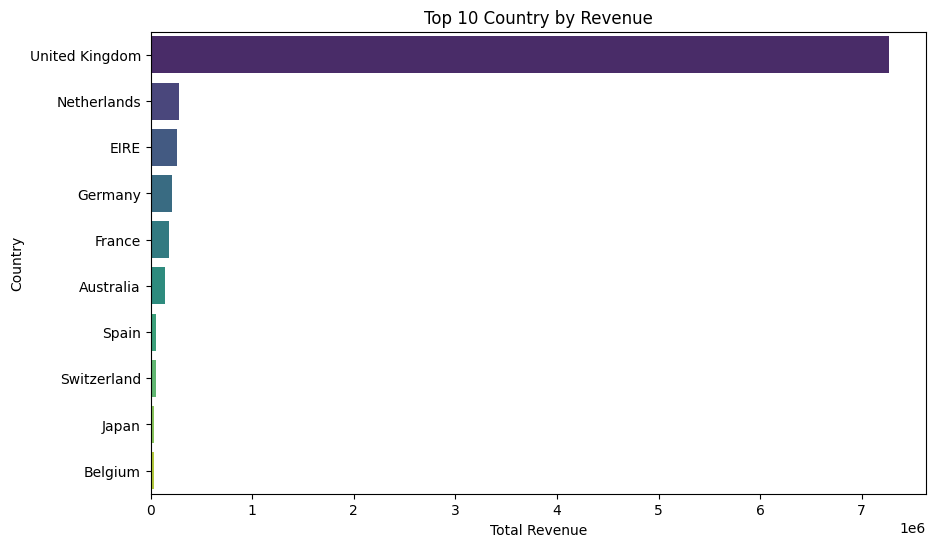

In [714]:
# Calculate total revenue by country
country_revenue = cleaned_retail_df.groupby('Country')['TotalRevenue'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=country_revenue, x='TotalRevenue', y='Country', palette='viridis')
plt.title("Top 10 Country by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.show()

> Store market sales is maily in UK     
> Out of the top 10 countries, 9 are in Europe. 

In [715]:
cleaned_retail_df = cleaned_retail_df.drop(columns=['DayOfWeek', 'Hour'])
cleaned_retail_df

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalRevenue,Country
0,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,United Kingdom
1,17850,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,United Kingdom
2,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,United Kingdom
3,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,United Kingdom
4,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,United Kingdom
...,...,...,...,...,...,...,...,...,...
541904,12680,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,France
541905,12680,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,France
541906,12680,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,France
541907,12680,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,France


In [716]:
cleaned_retail_df.to_csv("/Users/darylwanji/Desktop/Data Projects /Darylwanji-Data-Insights-for-Call-Center-Efficiency-and-Performance/Data/CleanedRetail.csv",index=False)